# Ford GoBike Data - Explanatory Analysis


This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

## Table of Contents

- Gathering Data
- Data Assessment
- Cleaning the Data
- Univariate Exploration
- Bivariate Exploration
- Multivariate Exploration

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Gathering Data

In this section we will be loading our data as we already have all the necessary files required to do all our further investigations from ford (https://www.fordgobike.com/system-data). We will load our Ford GoBike dataset into a dataframe.

In [2]:
go_bike = pd.read_csv('201902-fordgobike-tripdata.csv')

## Data Assessment

In [3]:
go_bike.sample(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
119514,523,2019-02-11 17:47:27.0550,2019-02-11 17:56:11.0510,274.0,Oregon St at Adeline St,37.857567,-122.267558,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,3266,Subscriber,1996.0,Female,Yes
27138,976,2019-02-25 09:58:58.0960,2019-02-25 10:15:14.7940,194.0,Lakeshore Ave at Trestle Glen Rd,37.811081,-122.243268,202.0,Washington St at 8th St,37.800754,-122.274894,6061,Subscriber,1995.0,Female,No
81403,1014,2019-02-18 13:09:47.9670,2019-02-18 13:26:42.4300,274.0,Oregon St at Adeline St,37.857567,-122.267558,171.0,Rockridge BART Station,37.844279,-122.251900,1009,Subscriber,1977.0,Female,No
20456,205,2019-02-26 12:38:09.7470,2019-02-26 12:41:35.0720,256.0,Hearst Ave at Euclid Ave,37.875112,-122.260553,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,6425,Customer,1984.0,Male,No
92790,525,2019-02-15 18:21:45.5450,2019-02-15 18:30:30.7950,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,92.0,Mission Bay Kids Park,37.772301,-122.393028,5222,Subscriber,1981.0,Male,No
95872,493,2019-02-15 12:08:58.2800,2019-02-15 12:17:11.7320,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,27.0,Beale St at Harrison St,37.788059,-122.391865,6430,Subscriber,1995.0,Female,No
146352,516,2019-02-07 08:48:16.3650,2019-02-07 08:56:52.6770,26.0,1st St at Folsom St,37.787290,-122.394380,64.0,5th St at Brannan St,37.776754,-122.399018,3569,Subscriber,1989.0,Male,No
113120,449,2019-02-12 13:07:09.0480,2019-02-12 13:14:38.3660,365.0,Turk St at Fillmore St,37.780450,-122.431946,369.0,Hyde St at Post St,37.787349,-122.416651,4972,Subscriber,1986.0,Male,No
173624,570,2019-02-03 10:17:24.2230,2019-02-03 10:26:54.4300,76.0,McCoppin St at Valencia St,37.771662,-122.422423,141.0,Valencia St at Cesar Chavez St,37.747998,-122.420219,4976,Subscriber,1988.0,Male,No
156647,330,2019-02-06 07:42:43.8450,2019-02-06 07:48:13.9800,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,27.0,Beale St at Harrison St,37.788059,-122.391865,1594,Subscriber,1963.0,Male,No


In [4]:
print(go_bike.shape[0])
print(go_bike.info())
print(go_bike.describe())

183412
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 1

In [5]:
go_bike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
go_bike.duplicated().sum()

0

### Observations

- There are few columns like latitude and longitude for start and stop stations which i won't be using for our analysis.
- Missing data in the station id's can be dropped off.
- DataTypes of columns (start_time, end_time, start_station_id,	end_station_id, bike_id, member_birth_year) need to be changed as per requirement.
- Member birth year can be used to calculate their age and make age groups.

### These questions will help us to get a better analysis for our data.

When are most trips taken in terms of time of day, day of the week, or month of the year?

How long does the average trip take?

Does the above depend on if a user is a subscriber or customer?

## Data Cleaning

In [7]:
#creating a copy of our dataset before cleaning
go_bike_clean = go_bike.copy()

- Dropping the latitude and longitude columns.

In [8]:
go_bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [9]:
columns= ['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude']
go_bike_clean.drop(columns, axis=1, inplace=True)
go_bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   end_station_id           183215 non-null  float64
 6   end_station_name         183215 non-null  object 
 7   bike_id                  183412 non-null  int64  
 8   user_type                183412 non-null  object 
 9   member_birth_year        175147 non-null  float64
 10  member_gender            175147 non-null  object 
 11  bike_share_for_all_trip  183412 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 16.8+ MB


- Adding an age_member column for all the members of our dataset. 

In [10]:
#As our data set is from 2019 we'll be subtracting thier birthyear from 2019.
go_bike_clean['member_age'] = 2019 - go_bike_clean['member_birth_year']

In [11]:
go_bike_clean.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
106117,629,2019-02-13 18:50:55.7380,2019-02-13 19:01:25.4540,137.0,Jersey St at Castro St,119.0,18th St at Noe St,5023,Subscriber,1993.0,Male,No,26.0
95613,849,2019-02-15 13:06:46.5650,2019-02-15 13:20:56.3860,324.0,Union Square (Powell St at Post St),58.0,Market St at 10th St,2250,Subscriber,1999.0,Female,No,20.0
157579,352,2019-02-05 21:25:46.7590,2019-02-05 21:31:39.6770,248.0,Telegraph Ave at Ashby Ave,240.0,Haste St at Telegraph Ave,118,Subscriber,1986.0,Male,No,33.0
33430,603,2019-02-24 11:44:14.9400,2019-02-24 11:54:18.9370,123.0,Folsom St at 19th St,145.0,29th St at Church St,4958,Subscriber,NaN,NaN,No,NaN
62554,417,2019-02-20 16:47:12.6850,2019-02-20 16:54:10.3580,27.0,Beale St at Harrison St,364.0,China Basin St at 3rd St,5750,Subscriber,1990.0,Female,No,29.0


- Changing the Datatypes of columns as per the requirements.

In [12]:
go_bike_clean['start_time'] = pd.to_datetime(go_bike_clean['start_time'])
go_bike_clean['end_time'] = pd.to_datetime(go_bike_clean['end_time'])

go_bike_clean['start_station_id'] = go_bike_clean['start_station_id'].astype(object)
go_bike_clean['end_station_id'] = go_bike_clean['end_station_id'].astype(object)

go_bike_clean['bike_id'] = go_bike_clean['bike_id'].astype(object)
go_bike_clean['member_birth_year'] = go_bike_clean['member_birth_year'].astype(object)
go_bike_clean['member_age'] = go_bike_clean['member_age'].astype(object)

- Adding column based on period of time

In [13]:
go_bike_clean['start_hour'] = go_bike_clean['start_time'].apply(lambda time: time.hour)
go_bike_clean['period_day'] = 'morning'
go_bike_clean['period_day'][(go_bike_clean['start_hour'] >= 12) & (go_bike_clean['start_hour'] <= 17)] = 'afternoon'
go_bike_clean['period_day'][(go_bike_clean['start_hour'] >= 18) & (go_bike_clean['start_hour'] <= 23)] = 'night'

<ipython-input-13-4a7655e97765>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  go_bike_clean['period_day'][(go_bike_clean['start_hour'] >= 12) & (go_bike_clean['start_hour'] <= 17)] = 'afternoon'
<ipython-input-13-4a7655e97765>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  go_bike_clean['period_day'][(go_bike_clean['start_hour'] >= 18) & (go_bike_clean['start_hour'] <= 23)] = 'night'


In [14]:
go_bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   end_station_id           183215 non-null  object        
 6   end_station_name         183215 non-null  object        
 7   bike_id                  183412 non-null  object        
 8   user_type                183412 non-null  object        
 9   member_birth_year        175147 non-null  object        
 10  member_gender            175147 non-null  object        
 11  bike_share_for_all_trip  183412 non-null  object        
 12  member_age      

## Saving Master Dataset

In [15]:
#Saving the clean master dataset
go_bike_clean.to_csv('ford_gobike_master.csv', index = False)

In [16]:
#loading the saved master dataframe 
go_bike_df = pd.read_csv('ford_gobike_master.csv')
go_bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_hour,period_day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,35.0,17,afternoon
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,NaN,NaN,No,NaN,18,night
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,47.0,12,afternoon
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,30.0,17,afternoon
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,45.0,23,night


In [17]:
go_bike_df.user_type.value_counts()[1]

19868

## Univariate Exploration

Investigating individual variables.

**- What is the duration of bike rides?**

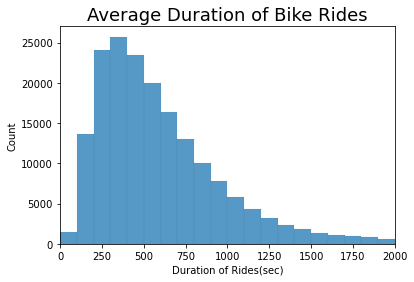

In [18]:
#Visualizing the data in a histogram
dur_bins = np.arange(0, go_bike_df['duration_sec'].max() + 100, 100)
sns.histplot(data = go_bike_df, x = 'duration_sec', bins = dur_bins);
plt.xlim(0, 2000);
plt.title('Average Duration of Bike Rides', fontsize = 18);
plt.xlabel('Duration of Rides(sec)');
plt.ylabel('Count');

When first visualised the plot was on the extreme right end due to outliers so i set a limit on the data. As i can see the data is right skewed and from this we can grasp that people only used bikes for a short duration. The peak can be seen at 350 secs which is approx 6 minutes and from there it goes on a downward trend. So most of the people tend to use bikes for short distance travel.

**- Subscribers vs Customers who use bikes for rides.**

In [19]:
#Determining number of members and non-members
n_subscribers = go_bike_df.user_type.value_counts()[0]
n_customers = go_bike_df.user_type.value_counts()[1]
print('Number of subscribers: {}'.format(n_subscribers))
print('Number of Customers: {}'.format(n_customers))

Number of subscribers: 163544
Number of Customers: 19868


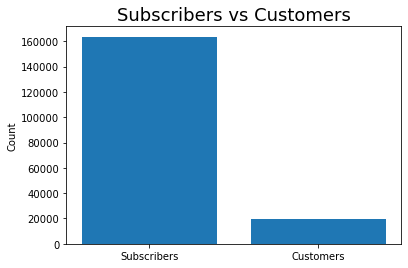

In [20]:
plt.bar(x = ['Subscribers', 'Customers'], height = [n_subscribers, n_customers]);
plt.title('Subscribers vs Customers', fontsize = 18);
plt.ylabel('Count');

As i can see majority of the people who use GoBikes are subscribers. Almost 80% people who rent bikes are subscribers.

**- Age of members using Bikes**

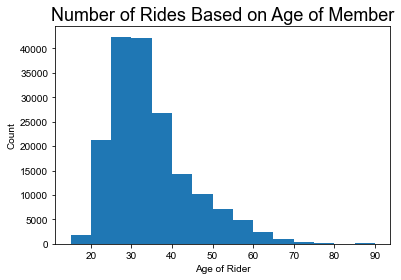

In [21]:
age_bins = np.arange(15, 90+5, 5)
plt.hist(data = go_bike_df, x = 'member_age', bins = age_bins);
plt.title('Number of Rides Based on Age of Member', fontsize = 18);
plt.xlabel('Age of Rider');
plt.ylabel('Count');
plt.style.use('seaborn');

People who use GoBikes are maximum from the age group between 30 and 40. After mid 40 the slope goes down alot in comparison to the peak, this shows that with age less people tend to ride bikes.

**- Top 8 Stations among members**

In [22]:
print(len(go_bike_df['start_station_name'].value_counts()))
go_bike_df['start_station_name'].value_counts().head(8)

329


Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
San Francisco Ferry Building (Harry Bridges Plaza)           2710
San Francisco Caltrain (Townsend St at 4th St)               2703
Powell St BART Station (Market St at 5th St)                 2327
Name: start_station_name, dtype: int64

In [23]:
# Do they have high traffics as end stations? Looks like yes!
print(len(go_bike_df['end_station_name'].value_counts()))
go_bike_df['end_station_name'].value_counts().head(8)

329


San Francisco Caltrain Station 2  (Townsend St at 4th St)    4857
Market St at 10th St                                         3973
Montgomery St BART Station (Market St at 2nd St)             3647
San Francisco Ferry Building (Harry Bridges Plaza)           3368
Powell St BART Station (Market St at 4th St)                 2997
San Francisco Caltrain (Townsend St at 4th St)               2947
Berry St at 4th St                                           2872
The Embarcadero at Sansome St                                2512
Name: end_station_name, dtype: int64

In [24]:
locs = ['San Francisco Ferry Building (Harry Bridges Plaza)','The Embarcadero at Sansome St','San Francisco Caltrain (Townsend St at 4th St)','San Francisco Caltrain Station 2  (Townsend St at 4th St)','Market St at 10th St','Montgomery St BART Station (Market St at 2nd St)','Berry St at 4th St','Powell St BART Station (Market St at 4th St)']
df_top8 = go_bike_df.loc[go_bike_df['start_station_name'].isin(locs)]

In [25]:
# Order top 8 stations from the number one (most trips) to the number eight (least trips)
loc_cl = locs = ['San Francisco Ferry Building (Harry Bridges Plaza)','The Embarcadero at Sansome St','San Francisco Caltrain (Townsend St at 4th St)','San Francisco Caltrain Station 2  (Townsend St at 4th St)','Market St at 10th St','Montgomery St BART Station (Market St at 2nd St)','Berry St at 4th St','Powell St BART Station (Market St at 4th St)']
loc_cl2 = pd.api.types.CategoricalDtype(ordered=True, categories=loc_cl)
df_top8['start_station_name'] = df_top8['start_station_name'].astype(loc_cl2)

<ipython-input-25-387eb2b56eef>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top8['start_station_name'] = df_top8['start_station_name'].astype(loc_cl2)


In [26]:
# Test and see if only keep top 8 station
df_top8['start_station_name'].value_counts()

Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
San Francisco Ferry Building (Harry Bridges Plaza)           2710
San Francisco Caltrain (Townsend St at 4th St)               2703
The Embarcadero at Sansome St                                2082
Name: start_station_name, dtype: int64

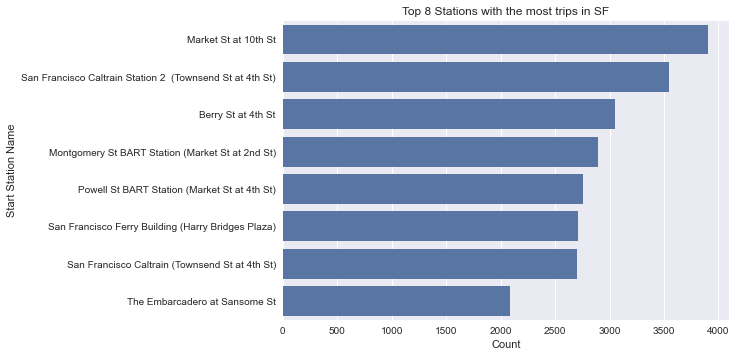

In [27]:
st_stat_counts = df_top8['start_station_name'].value_counts()
st_stat_order = st_stat_counts.index

base_color = sns.color_palette()[0]
sns.countplot(data=df_top8, y='start_station_name', color=base_color, order=st_stat_order)
plt.xlabel('Count')
plt.ylabel('Start Station Name')
plt.title('Top 8 Stations with the most trips in SF');
plt.style.use('seaborn')

As we can see Market St has the highest number of trips thoughout San Francisco. Montomery St Bart, Powel St Bart, SF Ferry Building and SF Caltrain all have almost identical number of trips. These are the top 8 stations with most trips in SF.

## Bivariate Exploration

After inverstigating individual variables, let's take a look at dependent variables.

**- How many rides are people of different ages going on?**

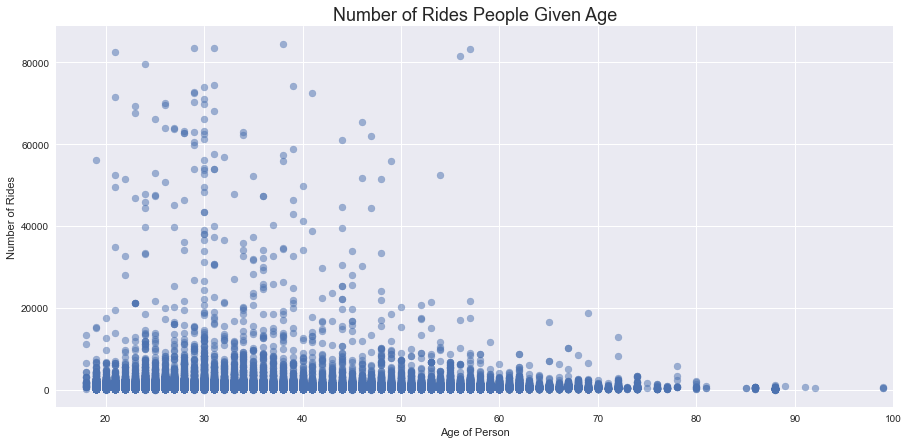

In [28]:
#Visualizing the data in a scatterplot
plt.figure(figsize = (15, 7))
plt.scatter(data = go_bike_df, x = 'member_age', y = 'duration_sec', alpha = 0.5);
plt.xlim(15, 100)
plt.style.use('seaborn')
plt.title('Number of Rides People Given Age', fontsize = 18);
plt.xlabel('Age of Person');
plt.ylabel('Number of Rides');

The rides seem to be clustered around the 30's age range as we can see much more activity from mid 20s to mid 40s. This gives us an idea that people below 25 might lack money power to rent bikes and people above mid 40 tend to lack energy. There are few others which don't follow this trend but the numbers themselves show us a majority.

**- Duration of rides from most visited stations.**

In [29]:
#Figuring out which stations are the ones most frequently visited and building a dataframe off of them
top_station = go_bike_df['start_station_name'].value_counts().index[:5]
go_bike_df_stations = go_bike_df.loc[go_bike_df['start_station_name'].isin(top_station)]

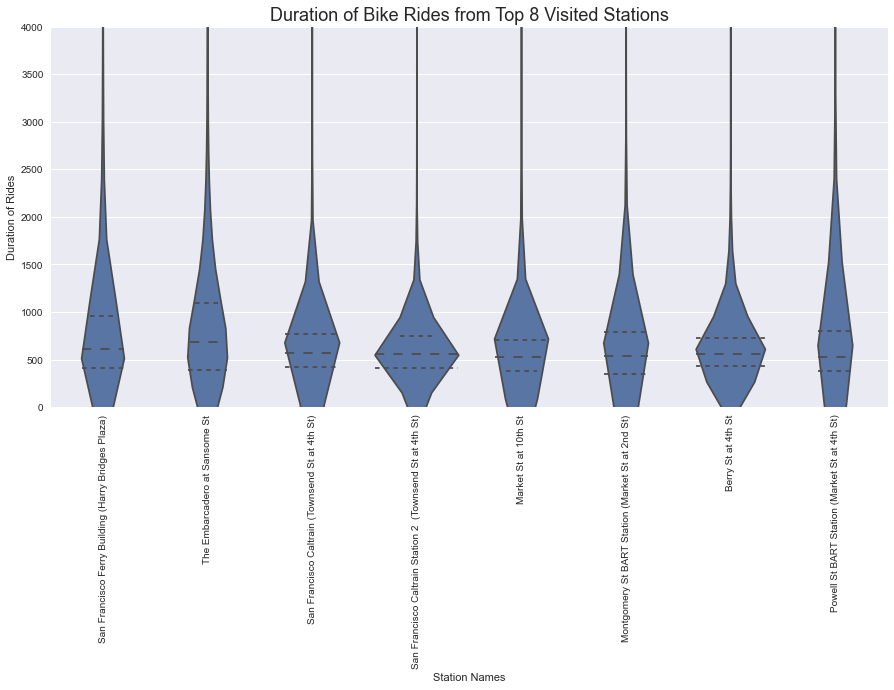

In [30]:
#Visualizing the data in a boxplot
base_color = sns.color_palette()[0]
plt.figure(figsize = (15,7))
sns.violinplot(data = df_top8, x = 'start_station_name', y = 'duration_sec', color = base_color, inner='quartile');
plt.xticks(rotation = 90);
plt.ylim(0, 4000);
plt.title('Duration of Bike Rides from Top 8 Visited Stations', fontsize = 18);
plt.xlabel('Station Names');
plt.ylabel('Duration of Rides')
plt.style.use('seaborn')

As i can see, mean duration of rides is almost same for all, but the density of rides at different stations is different. The duration of rides does go on to a large extend more than 8k secs, Powel St Bart station has the highest duration which exceeds 8k secs and Montgomery St Bart station is second in terms of duration which goes on till 6.5k secs

**- Trip count of top-8 stations based on different characteristics.**

In [31]:
users_chr = ['user_type','member_gender']

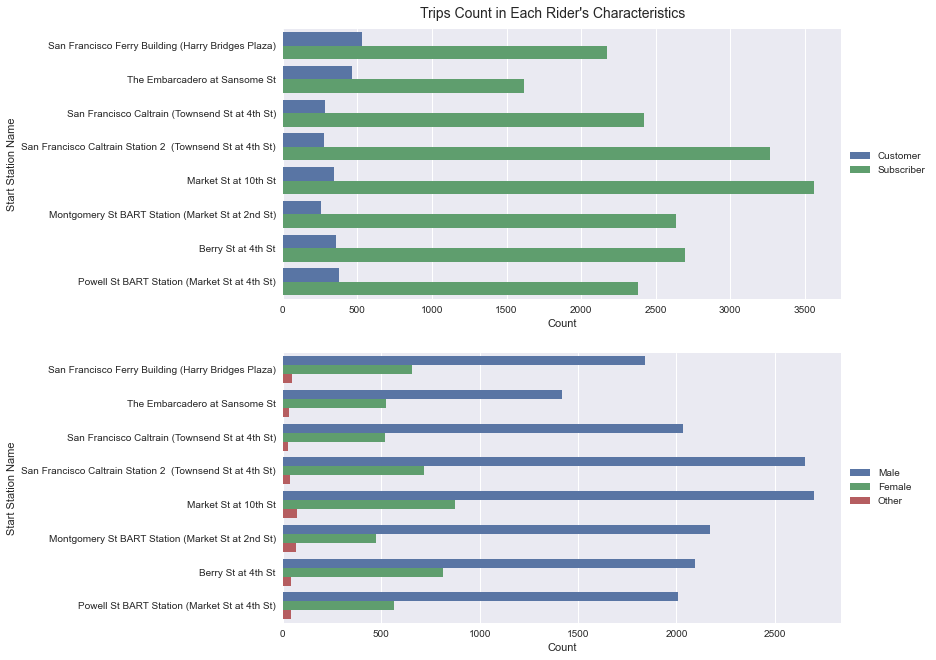

In [32]:
fig = plt.figure(figsize=(10,10))
plt.subplots_adjust(top=0.95)
fig.suptitle('Trips Count in Each Rider\'s Characteristics' , fontsize=14)
for i in range(1, 3):
    ax = fig.add_subplot(2, 1, i)
    sns.countplot(data=df_top8, y='start_station_name', hue=users_chr[i-1])
    plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
    plt.ylabel('Start Station Name')
    plt.xlabel('Count');

As we saw earlier compared to customers, subscribers are larger in number but in this we also get to compare their difference in the top 8 stations. By comparing it seems 80% of the rides are subscribers.
In the second plot we notice that the male riders tend to ride more than females and other genders. Male riders also have a much more ride count than the females and other genders.

## Multivariate Exploration

Now lets investiate three or more variables to further investigate our data. 

**- Which gender tends to take longer rides, and how does that also compare to age?**

we'll use some gender distinctive markers to determine how long rides tend to be across the genders and as a person gets older

In [33]:
go_bike_df.member_gender.unique()

array(['Male', nan, 'Other', 'Female'], dtype=object)

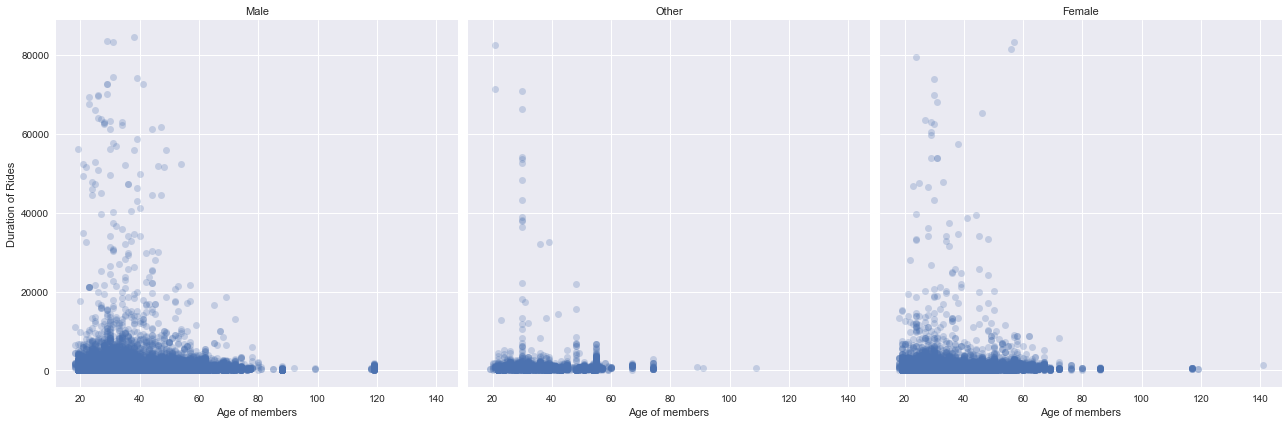

In [34]:
g = sns.FacetGrid(data = go_bike_df, col = 'member_gender', height = 6,
                 col_wrap = 3)
g.map(sns.regplot, 'member_age', 'duration_sec', y_jitter = 0.04, fit_reg = False,
      scatter_kws = {'alpha' : 1/4})
g.set_ylabels('Duration of Rides')
g.set_xlabels('Age of members')
g.set_titles('{col_name}');

Interestingly, there doesn't seem to be a strong indication that one gender necessarily rides longer than the other. While there's an unsurprising long tail when it comes to age, the data shows that Female and Other genders tend to ride just as long as Male riders.

**- Time of Ride: morning, afternoon, night between customers and subscribers.**

In [35]:
df_cust = df_top8.query('user_type == "Customer"')
df_sub = df_top8.query('user_type == "Subscriber"')

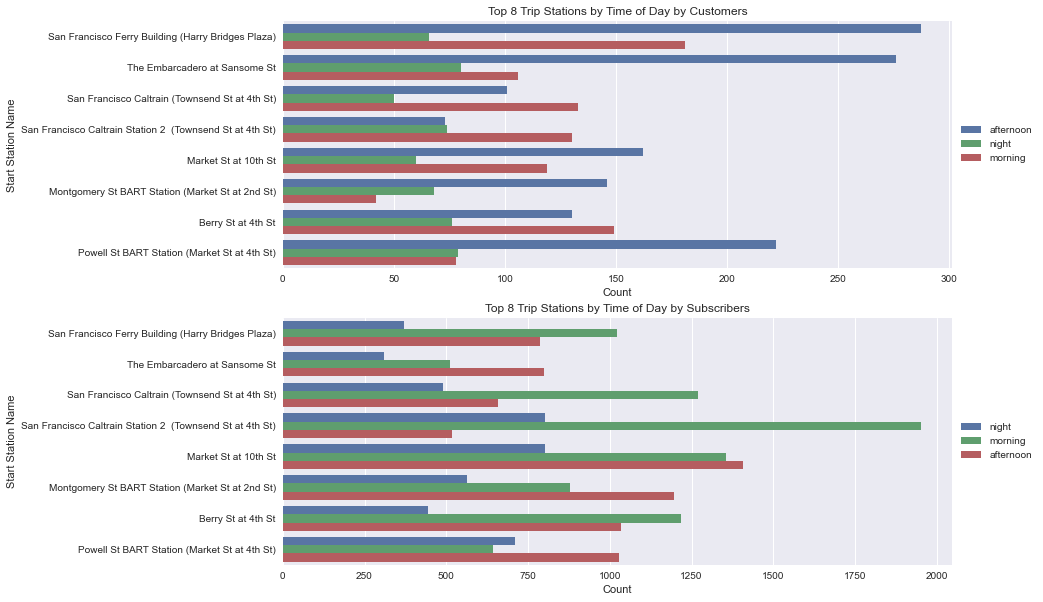

In [36]:
# 1. 3 categorical variables using countplot: time of day: morning, afternoon, night between customers and subscribers
plt.figure(figsize=(12,10))
ax = plt.subplot(211)
sns.countplot(data=df_cust, y='start_station_name', hue='period_day')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 8 Trip Stations by Time of Day by Customers')
plt.xlabel('Count')
plt.ylabel('Start Station Name')

ax = plt.subplot(212)
sns.countplot(data=df_sub, y='start_station_name', hue='period_day')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 8 Trip Stations by Time of Day by Subscribers')
plt.xlabel('Count')
plt.ylabel('Start Station Name');

In customers, they tend to prefer the afternoon duration for their rides but there as stations where the comparison is almost equal in nature, whereas the rides taken by subscribers were in the morning. The subscibers are daily users of bikes and they might be using these bikes for their daily commute to their workplace. A few stations did have a equal distribution of time period in case of subscribers.